<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Regression_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning


## Regression: feature selection
### Selecting the correct features:
- Reduces over?tting
- Improves accuracy
- Increases interpretability
- Reduces training time

### Feature selection methods
- Filter: Rank features based on statistical performance
- Wrapper: Use an ML method to evaluate performance
- Embedded: Iterative model training to extract features
- Feature importance: tree-based ML models


### Compare and contrast methods
|Method |Use an ML model |Select best subset |Can overfit|
| -------- | -------- | -------- | -------- |
|Filter |No |No |No|
|Wrapper |Yes |Yes |Sometimes|
|Embedded |Yes |Yes |Yes|
|Feature importance |Yes |Yes |Yes|

### Correlation coeficient statistical tests
|Feature/Response |Continuous |Categorical|
| -------- | -------- | -------- |
|Continuous |Pearson's Correlation |LDA|
|Categorical |ANOVA |Chi-Square|

## load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load data
url = "https://assets.datacamp.com/production/repositories/4983/datasets/97f3248581b7272784d23df9c30612d9eb0afb8d/diabetes.csv"
diabetes = pd.read_csv(url)
X = diabetes.drop(columns=["progression"])
y = diabetes["progression"]

### Filter functions
|Function |returns|
|---|---|
|df.corr() |Pearson's correlation matrix|
|sns.heatmap(corr_object) |heatmap plot|
|abs() |absolute value|

                  age       sex       bmi  ...        s5        s6  progression
age          1.000000  0.173737  0.185085  ...  0.270777  0.301731     0.187889
sex          0.173737  1.000000  0.088161  ...  0.149918  0.208133     0.043062
bmi          0.185085  0.088161  1.000000  ...  0.446159  0.388680     0.586450
bp           0.335427  0.241013  0.395415  ...  0.393478  0.390429     0.441484
s1           0.260061  0.035277  0.249777  ...  0.515501  0.325717     0.212022
s2           0.219243  0.142637  0.261170  ...  0.318353  0.290600     0.174054
s3          -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697    -0.394789
s4           0.203841  0.332115  0.413807  ...  0.617857  0.417212     0.430453
s5           0.270777  0.149918  0.446159  ...  1.000000  0.464670     0.565883
s6           0.301731  0.208133  0.388680  ...  0.464670  1.000000     0.382483
progression  0.187889  0.043062  0.586450  ...  0.565883  0.382483     1.000000

[11 rows x 11 columns]


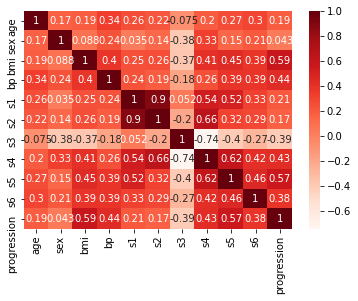

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [3]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

### Wrapper methods
1. Forward selection (LARS-least angle regression)
    - Starts with no features, adds one at a time
2. Backward elimination
    - Starts with all features, eliminates one at a time
3. Forward selection/backward elimination combination (bidirectional elimination)
4. Recursive feature elimination
    - RFECV

In [4]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [5]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498095
0.05226862285159132


### Tree-based feature importance methods
- Random Forest --> `sklearn.ensemble.RandomForestRegressor`
- Extra Trees --> `sklearn.ensemble.ExtraTreesRegressor`
- After model fit --> `tree_mod.feature_importances_`

|Function |returns|
|---|---|
|`sklearn.svm.SVR` |support vector regression estimator|
|`sklearn.feature_selection.RFECV` |recursive feature elimination with cross-val|
|`rfe_mod.support_` |boolean array of selected features|
|`ref_mod.ranking_` |feature ranking, selected=1|
|`sklearn.linear_model.LinearRegression` |linear model estimator|
|`sklearn.linear_model.LarsCV` |least angle regression with cross-val|
|`LarsCV.score` |r-squared score|
|`LarsCV.alpha_` |estimated regularization parameter|

In [6]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]


In [7]:
# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.0613247  0.26582602 0.11353061 0.05039899 0.05113997 0.0692288
 0.06861552 0.24065625 0.07927914]


### Embedded methods
1. Lasso Regression
2. Ridge Regression
3. ElasticNet
